In [206]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [207]:
# import csv
df = pd.read_csv('data.csv')
df.head()

row.names  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
0          1  160    12.00  5.73      23.11  Present     49    25.30    97.20   
1          2  144     0.01  4.41      28.61   Absent     55    28.87     2.06   
2          3  118     0.08  3.48      32.28  Present     52    29.14     3.81   
3          4  170     7.50  6.41      38.03  Present     51    31.99    24.26   
4          5  134    13.60  3.50      27.78  Present     60    25.99    57.34   

   age  chd  
0   52    1  
1   63    1  
2   46    0  
3   58    1  
4   49    1

In [208]:
df[df.duplicated].shape

(0, 11)

In [209]:
df.describe().transpose()

count        mean         std     min       25%      50%       75%  \
row.names  462.0  231.935065  133.938585    1.00  116.2500  231.500  347.7500   
sbp        462.0  138.326840   20.496317  101.00  124.0000  134.000  148.0000   
tobacco    462.0    3.635649    4.593024    0.00    0.0525    2.000    5.5000   
ldl        462.0    4.740325    2.070909    0.98    3.2825    4.340    5.7900   
adiposity  462.0   25.406732    7.780699    6.74   19.7750   26.115   31.2275   
typea      462.0   53.103896    9.817534   13.00   47.0000   53.000   60.0000   
obesity    462.0   26.044113    4.213680   14.70   22.9850   25.805   28.4975   
alcohol    462.0   17.044394   24.481059    0.00    0.5100    7.510   23.8925   
age        462.0   42.816017   14.608956   15.00   31.0000   45.000   55.0000   
chd        462.0    0.346320    0.476313    0.00    0.0000    0.000    1.0000   

              max  
row.names  463.00  
sbp        218.00  
tobacco     31.20  
ldl         15.33  
adiposity   42.49  
typea       78.00  
obesity     46.58  
alcohol    147.19  
age         64.00  
chd          1.00

In [210]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 462 rows and 11 columns


In [211]:
# get the types of data in the dataset
df.dtypes

row.names      int64
sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

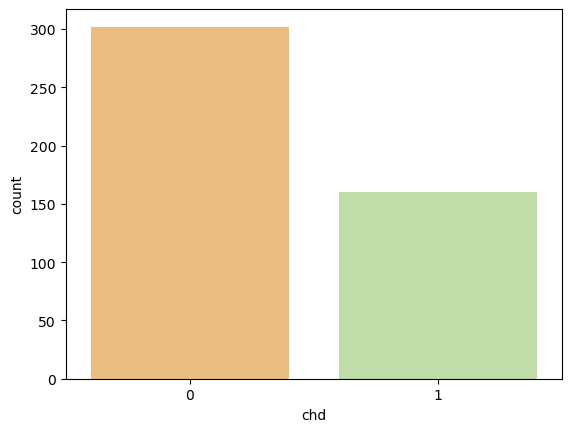

In [212]:
sns.countplot(x=df.chd,palette='Spectral')
plt.show()

In [213]:
def plot_boxplots(dataframe):
    num_columns = dataframe.select_dtypes(include=['number']).columns 
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, 20))  

    for i, column in enumerate(num_columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        sns.boxplot(x=dataframe[column], ax=ax)
        ax.set_title(f"Boxplot of {column}")
        ax.set_xlabel(column)

    plt.tight_layout()
    plt.show()

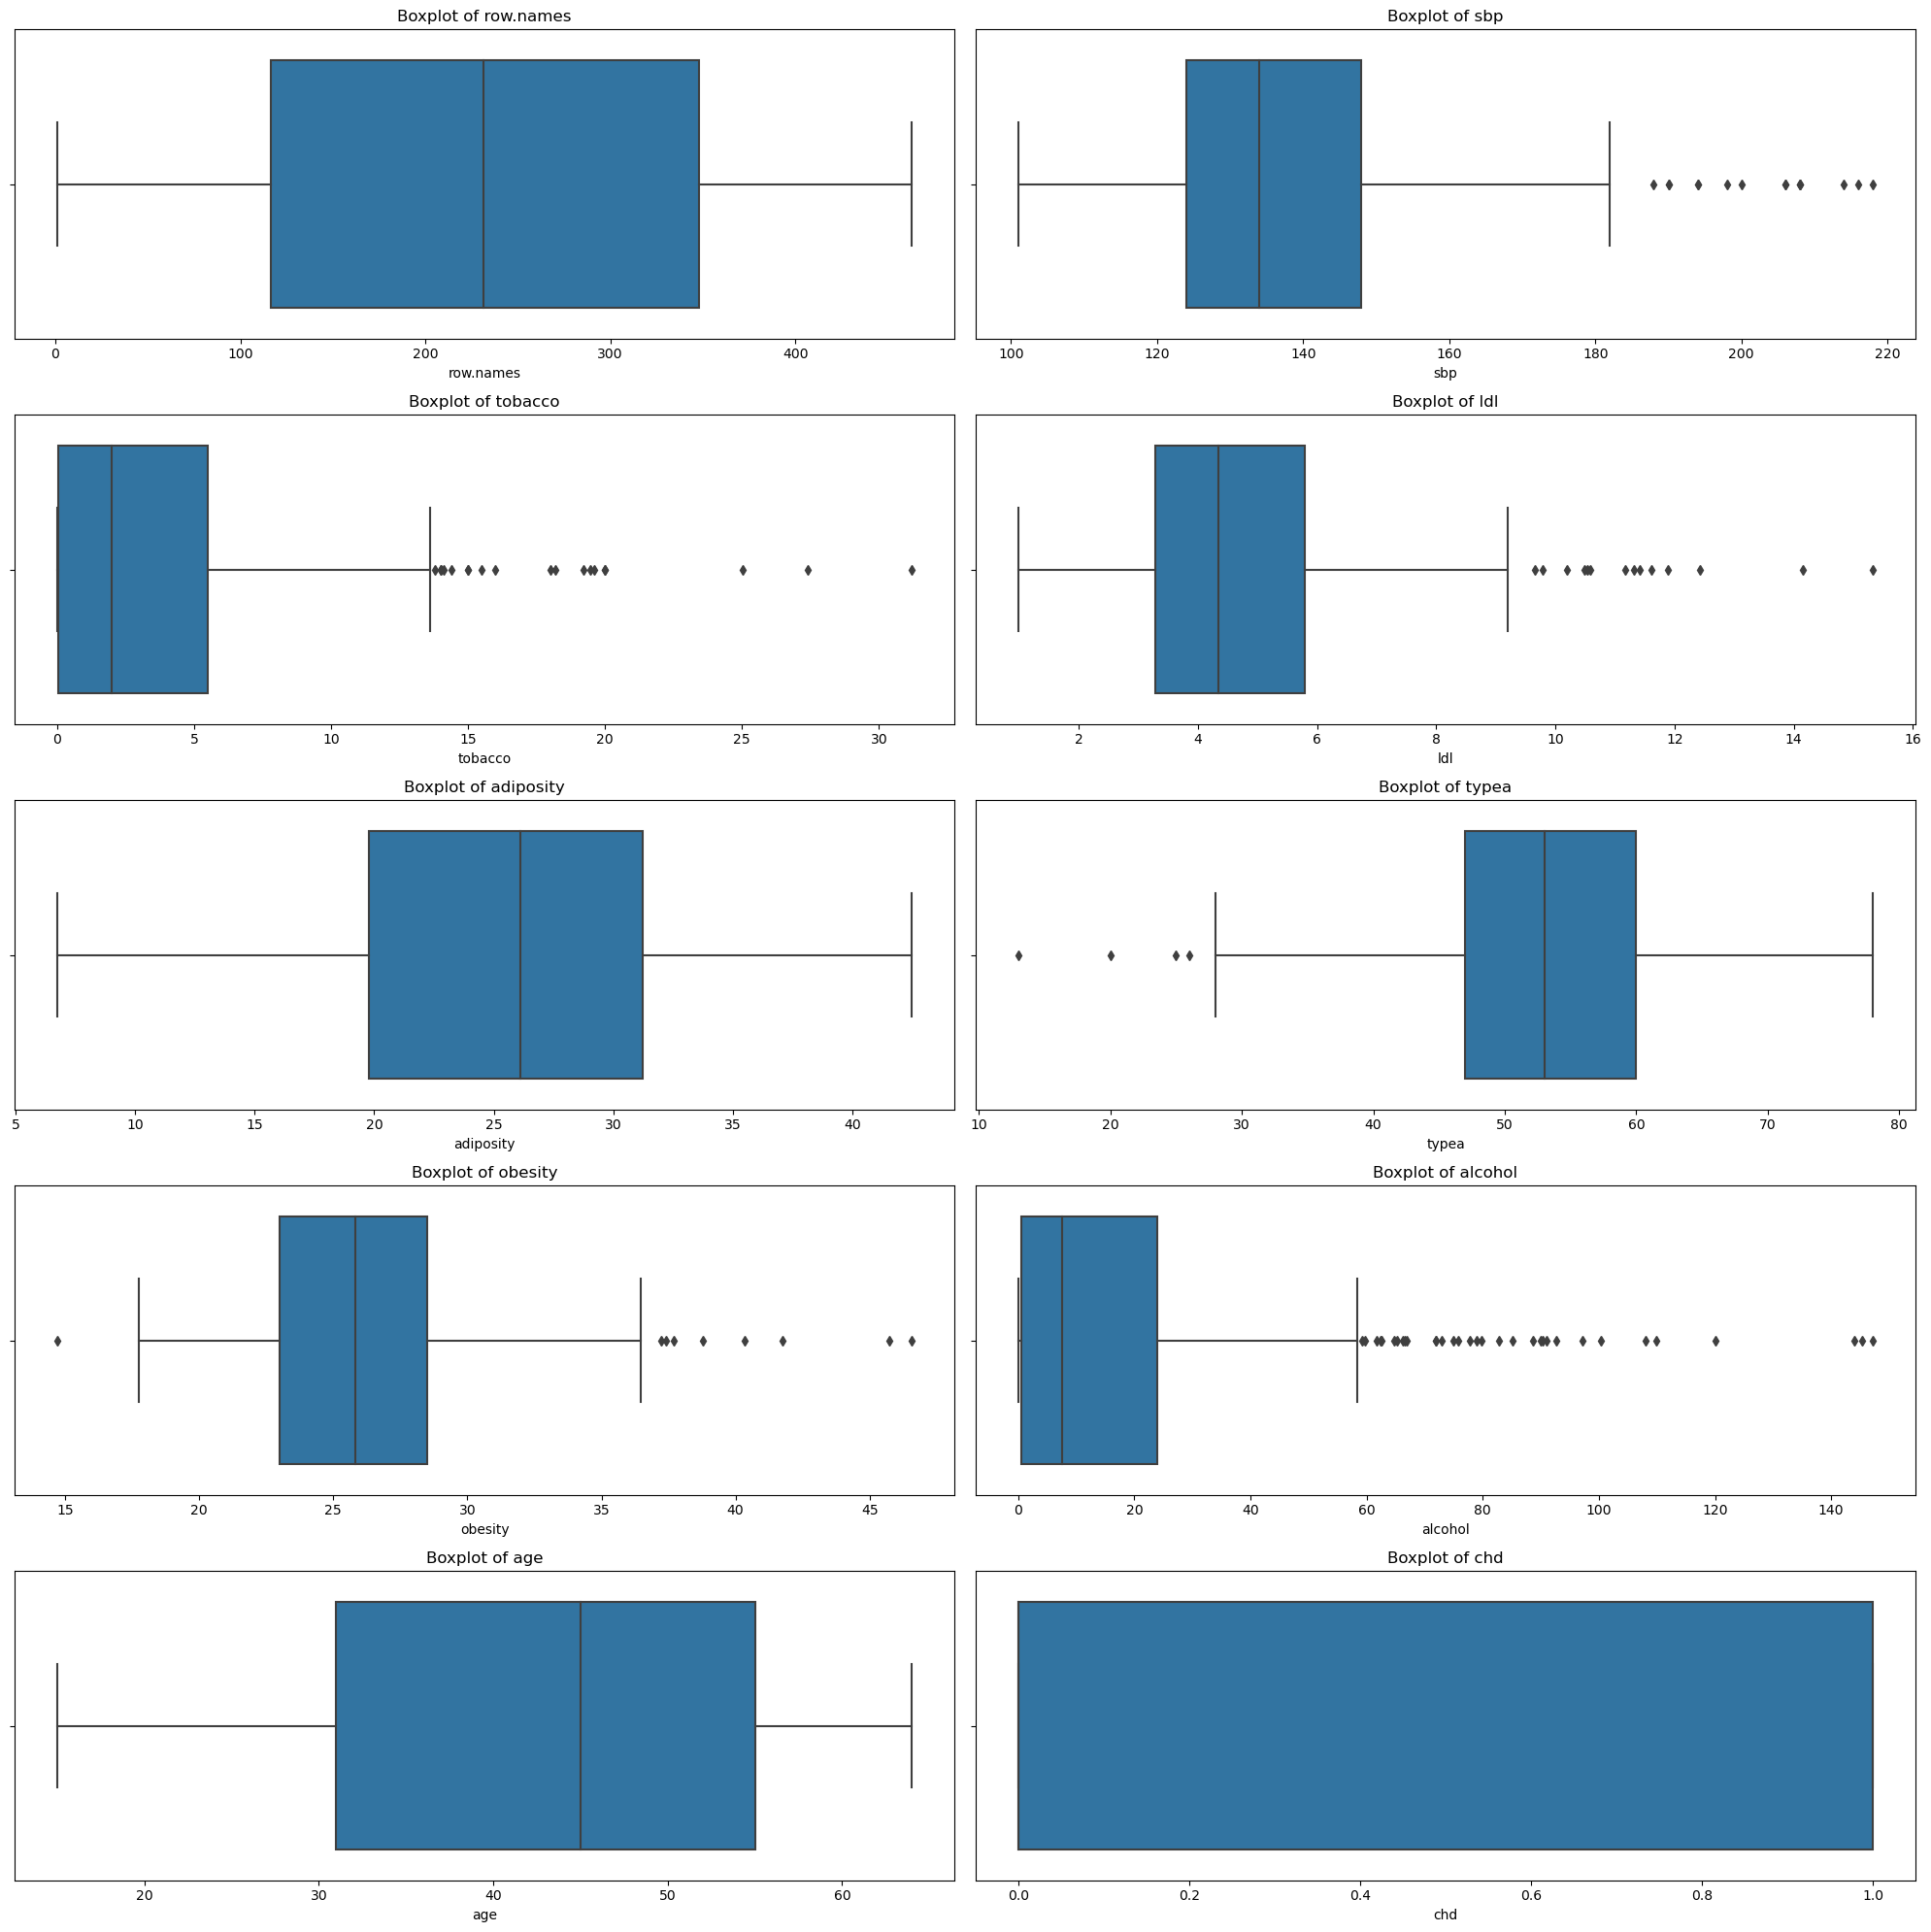

In [214]:
plot_boxplots(df)

# Cleaning the data

In [215]:
df1 = df.copy()
df1

row.names  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  \
0            1  160    12.00   5.73      23.11  Present     49    25.30   
1            2  144     0.01   4.41      28.61   Absent     55    28.87   
2            3  118     0.08   3.48      32.28  Present     52    29.14   
3            4  170     7.50   6.41      38.03  Present     51    31.99   
4            5  134    13.60   3.50      27.78  Present     60    25.99   
..         ...  ...      ...    ...        ...      ...    ...      ...   
457        459  214     0.40   5.98      31.72   Absent     64    28.45   
458        460  182     4.20   4.41      32.10   Absent     52    28.61   
459        461  108     3.00   1.59      15.23   Absent     40    20.09   
460        462  118     5.40  11.61      30.79   Absent     64    27.35   
461        463  132     0.00   4.82      33.41  Present     62    14.70   

     alcohol  age  chd  
0      97.20   52    1  
1       2.06   63    1  
2       3.81   46    0  
3      24.26   58    1  
4      57.34   49    1  
..       ...  ...  ...  
457     0.00   58    0  
458    18.72   52    1  
459    26.64   55    0  
460    23.97   40    0  
461     0.00   46    1  

[462 rows x 11 columns]

In [216]:
df1.max()

row.names        463
sbp              218
tobacco         31.2
ldl            15.33
adiposity      42.49
famhist      Present
typea             78
obesity        46.58
alcohol       147.19
age               64
chd                1
dtype: object

In [217]:
# check for missing values
df1.isna().sum()

row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [218]:
# remove rownames
df1 = df1.drop('row.names', axis=1)
df1

sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11  Present     49    25.30    97.20   52   
1    144     0.01   4.41      28.61   Absent     55    28.87     2.06   63   
2    118     0.08   3.48      32.28  Present     52    29.14     3.81   46   
3    170     7.50   6.41      38.03  Present     51    31.99    24.26   58   
4    134    13.60   3.50      27.78  Present     60    25.99    57.34   49   
..   ...      ...    ...        ...      ...    ...      ...      ...  ...   
457  214     0.40   5.98      31.72   Absent     64    28.45     0.00   58   
458  182     4.20   4.41      32.10   Absent     52    28.61    18.72   52   
459  108     3.00   1.59      15.23   Absent     40    20.09    26.64   55   
460  118     5.40  11.61      30.79   Absent     64    27.35    23.97   40   
461  132     0.00   4.82      33.41  Present     62    14.70     0.00   46   

     chd  
0      1  
1      1  
2      0  
3      1  
4      1  
..   ...  
457    0  
458    1  
459    0  
460    0  
461    1  

[462 rows x 10 columns]

In [219]:
df1['famhist'] = df1['famhist'].replace({'Present': 1, 'Absent': 0})
df1

sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11        1     49    25.30    97.20   52   
1    144     0.01   4.41      28.61        0     55    28.87     2.06   63   
2    118     0.08   3.48      32.28        1     52    29.14     3.81   46   
3    170     7.50   6.41      38.03        1     51    31.99    24.26   58   
4    134    13.60   3.50      27.78        1     60    25.99    57.34   49   
..   ...      ...    ...        ...      ...    ...      ...      ...  ...   
457  214     0.40   5.98      31.72        0     64    28.45     0.00   58   
458  182     4.20   4.41      32.10        0     52    28.61    18.72   52   
459  108     3.00   1.59      15.23        0     40    20.09    26.64   55   
460  118     5.40  11.61      30.79        0     64    27.35    23.97   40   
461  132     0.00   4.82      33.41        1     62    14.70     0.00   46   

     chd  
0      1  
1      1  
2      0  
3      1  
4      1  
..   ...  
457    0  
458    1  
459    0  
460    0  
461    1  

[462 rows x 10 columns]

In [220]:
df1.max()

sbp          218.00
tobacco       31.20
ldl           15.33
adiposity     42.49
famhist        1.00
typea         78.00
obesity       46.58
alcohol      147.19
age           64.00
chd            1.00
dtype: float64

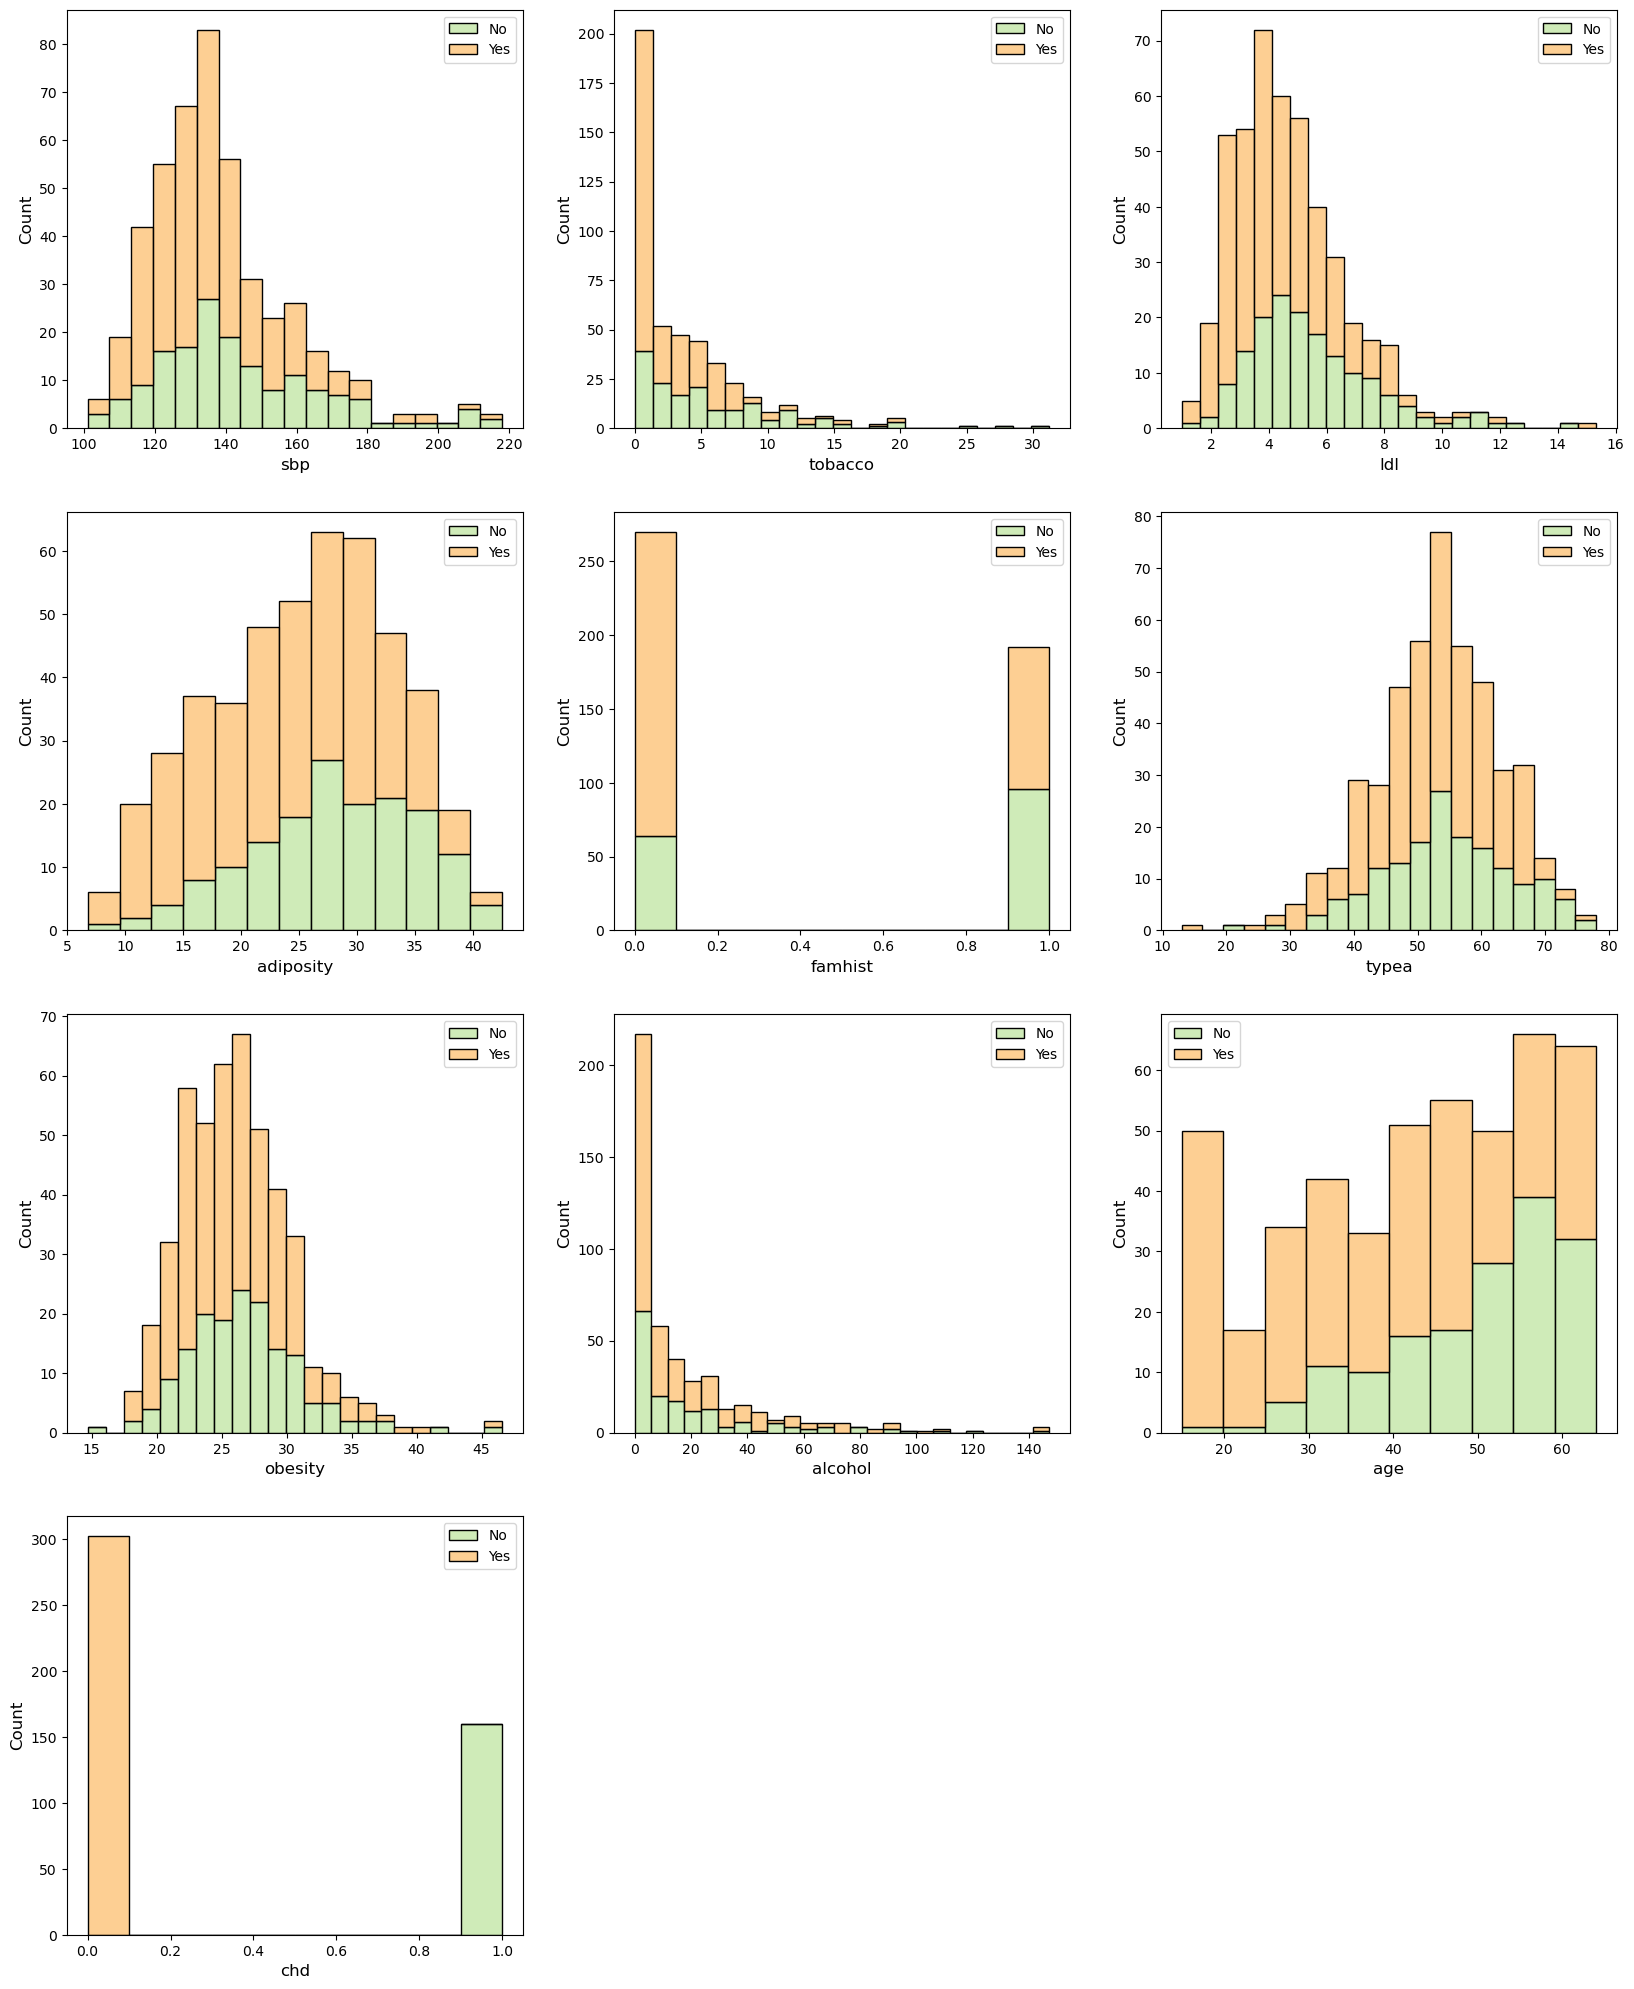

In [221]:
# plot histogram of all the features and hue = chd
plt.figure(figsize=(20,25), facecolor='white')

for i, column in enumerate(df1.columns, 1):
    ax = plt.subplot(4, 3, i)
    sns.histplot(data=df1, x=column, hue='chd', ax=ax, palette='Spectral', multiple='stack')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(['No', 'Yes'])
    
plt.show()



In [222]:
def remove_extreme(df, columns, k=1.5):
    for column in columns:
        q1 = df[column].quantile(0.25) # We find the 25 smallest values
        q3 = df[column].quantile(0.75) # We find the 25 largest values

        iqr = q3 - q1

        df[column] = df[column].clip(lower=q1 - k * iqr, upper=q3 + k * iqr)

    return df

In [223]:
df2 = df1.copy()
remove_extreme(df2,['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age'])

sbp  tobacco      ldl  adiposity  famhist  typea   obesity   alcohol  \
0    160    12.00  5.73000      23.11        1   49.0  25.30000  58.96625   
1    144     0.01  4.41000      28.61        0   55.0  28.87000   2.06000   
2    118     0.08  3.48000      32.28        1   52.0  29.14000   3.81000   
3    170     7.50  6.41000      38.03        1   51.0  31.99000  24.26000   
4    134    13.60  3.50000      27.78        1   60.0  25.99000  57.34000   
..   ...      ...      ...        ...      ...    ...       ...       ...   
457  184     0.40  5.98000      31.72        0   64.0  28.45000   0.00000   
458  182     4.20  4.41000      32.10        0   52.0  28.61000  18.72000   
459  108     3.00  1.59000      15.23        0   40.0  20.09000  26.64000   
460  118     5.40  9.55125      30.79        0   64.0  27.35000  23.97000   
461  132     0.00  4.82000      33.41        1   62.0  14.71625   0.00000   

     age  chd  
0     52    1  
1     63    1  
2     46    0  
3     58    1  
4     49    1  
..   ...  ...  
457   58    0  
458   52    1  
459   55    0  
460   40    0  
461   46    1  

[462 rows x 10 columns]

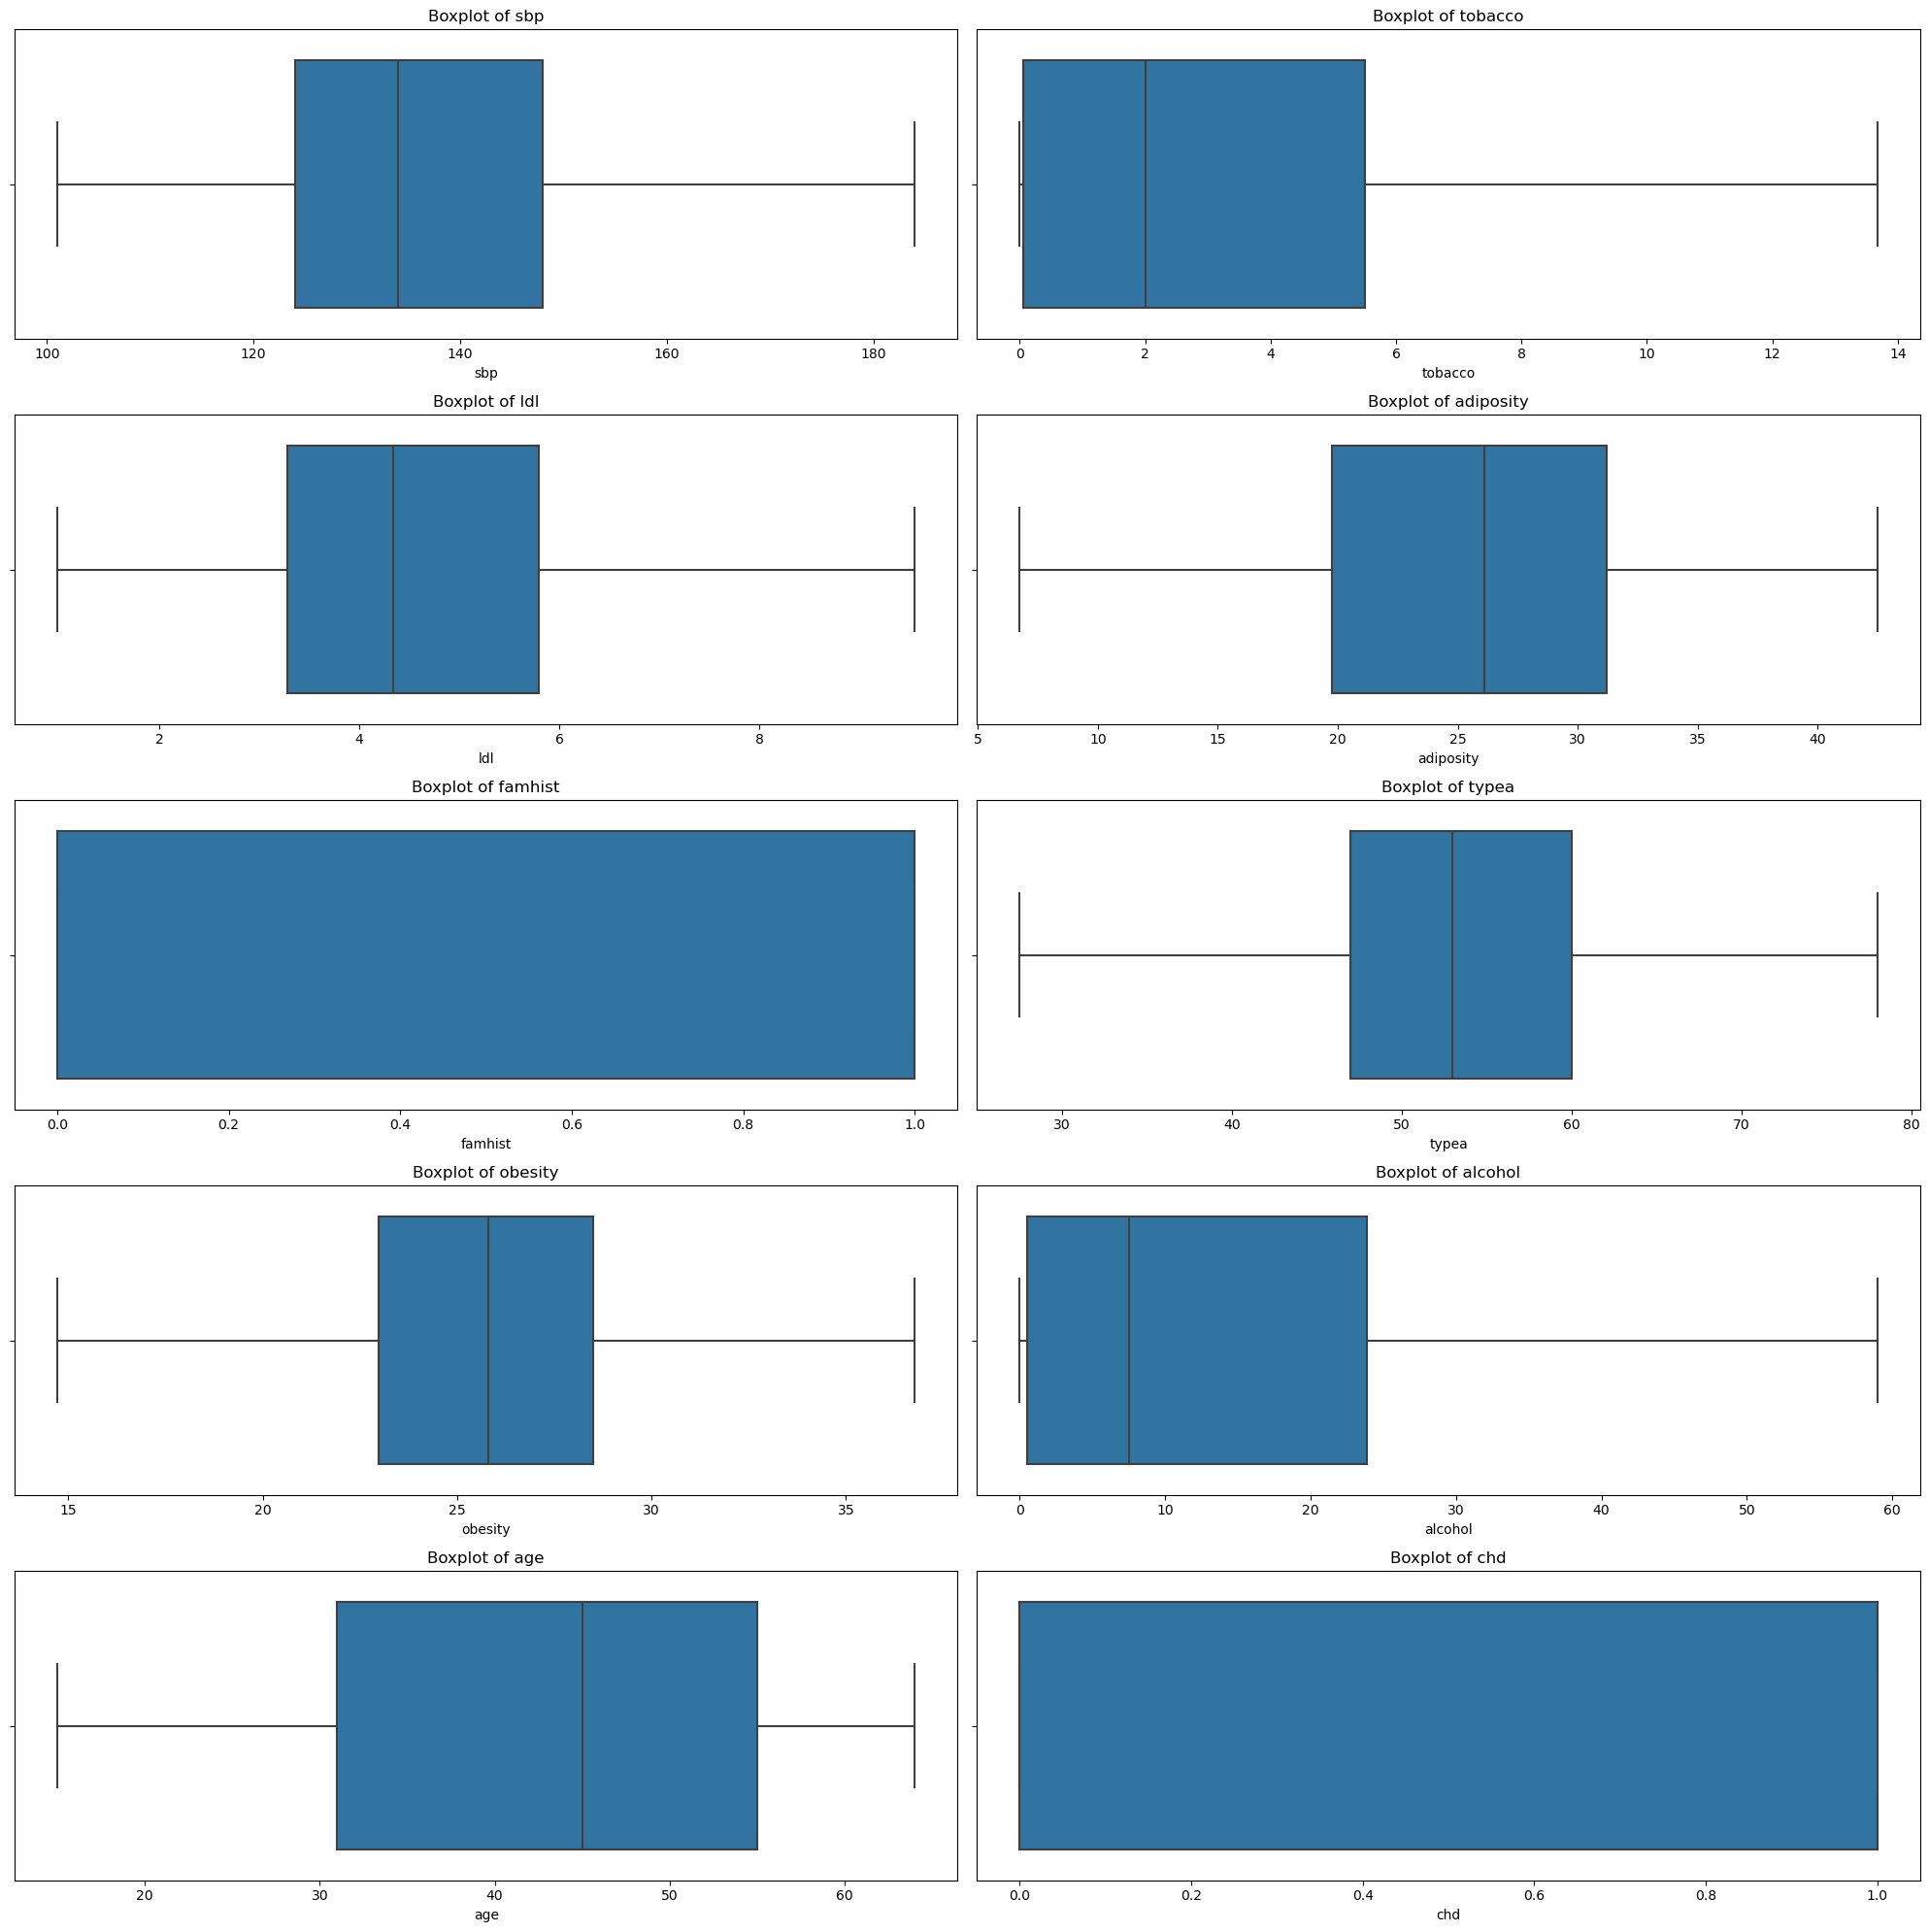

In [224]:
plot_boxplots(df2)

In [225]:
df3 = df2.drop(['chd', 'famhist'], axis=1)
df3

sbp  tobacco      ldl  adiposity  typea   obesity   alcohol  age
0    160    12.00  5.73000      23.11   49.0  25.30000  58.96625   52
1    144     0.01  4.41000      28.61   55.0  28.87000   2.06000   63
2    118     0.08  3.48000      32.28   52.0  29.14000   3.81000   46
3    170     7.50  6.41000      38.03   51.0  31.99000  24.26000   58
4    134    13.60  3.50000      27.78   60.0  25.99000  57.34000   49
..   ...      ...      ...        ...    ...       ...       ...  ...
457  184     0.40  5.98000      31.72   64.0  28.45000   0.00000   58
458  182     4.20  4.41000      32.10   52.0  28.61000  18.72000   52
459  108     3.00  1.59000      15.23   40.0  20.09000  26.64000   55
460  118     5.40  9.55125      30.79   64.0  27.35000  23.97000   40
461  132     0.00  4.82000      33.41   62.0  14.71625   0.00000   46

[462 rows x 8 columns]

In [226]:
# df3 how many spd with 184
df3[df3['sbp'] == 184].shape

(15, 8)

In [227]:
# maximum value of each column
df1.max()

sbp          218.00
tobacco       31.20
ldl           15.33
adiposity     42.49
famhist        1.00
typea         78.00
obesity       46.58
alcohol      147.19
age           64.00
chd            1.00
dtype: float64

In [228]:
# normalize data
df3_normalized = (df3 - df3.mean()) / df3.std()
df3_normalized

sbp   tobacco       ldl  adiposity     typea   obesity   alcohol  \
0    1.189766  2.189839  0.556776  -0.295183 -0.431631 -0.170038  2.374303   
1    0.335160 -0.877691 -0.144700   0.411694  0.190888  0.727788 -0.707667   
2   -1.053574 -0.859782 -0.638922   0.883374 -0.120372  0.795691 -0.612889   
3    1.723894  1.038556  0.918142   1.622382 -0.224125  1.512443  0.494657   
4   -0.198969  2.599184 -0.628293   0.305020  0.709653  0.003491  2.286228   
..        ...       ...       ...        ...       ...       ...       ...   
457  2.471674 -0.777913  0.689631   0.811401  1.124666  0.622161 -0.819234   
458  2.364848  0.194282 -0.144700   0.860240 -0.120372  0.662400  0.194618   
459 -1.587703 -0.112727 -1.643307  -1.307946 -1.365409 -1.480311  0.623555   
460 -1.053574  0.501291  2.587468   0.691875  1.124666  0.345520  0.478951   
461 -0.305794 -0.880249  0.073183   1.028605  0.917159 -2.831765 -0.819234   

          age  
0    0.628654  
1    1.381617  
2    0.217947  
3    1.039361  
4    0.423301  
..        ...  
457  1.039361  
458  0.628654  
459  0.834008  
460 -0.192760  
461  0.217947  

[462 rows x 8 columns]

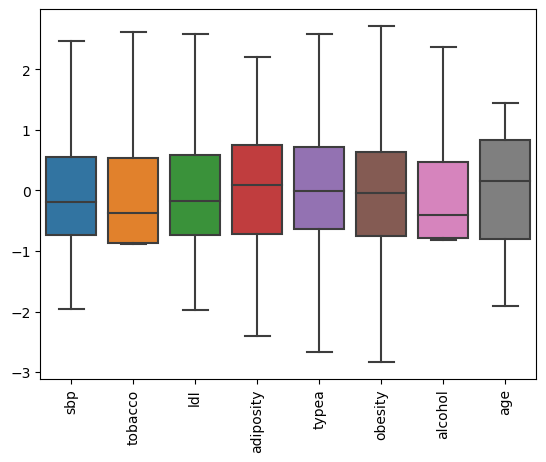

In [229]:
# boxplot of normalized data
sns.boxplot(data=df3_normalized)
plt.xticks(rotation=90)
plt.show()

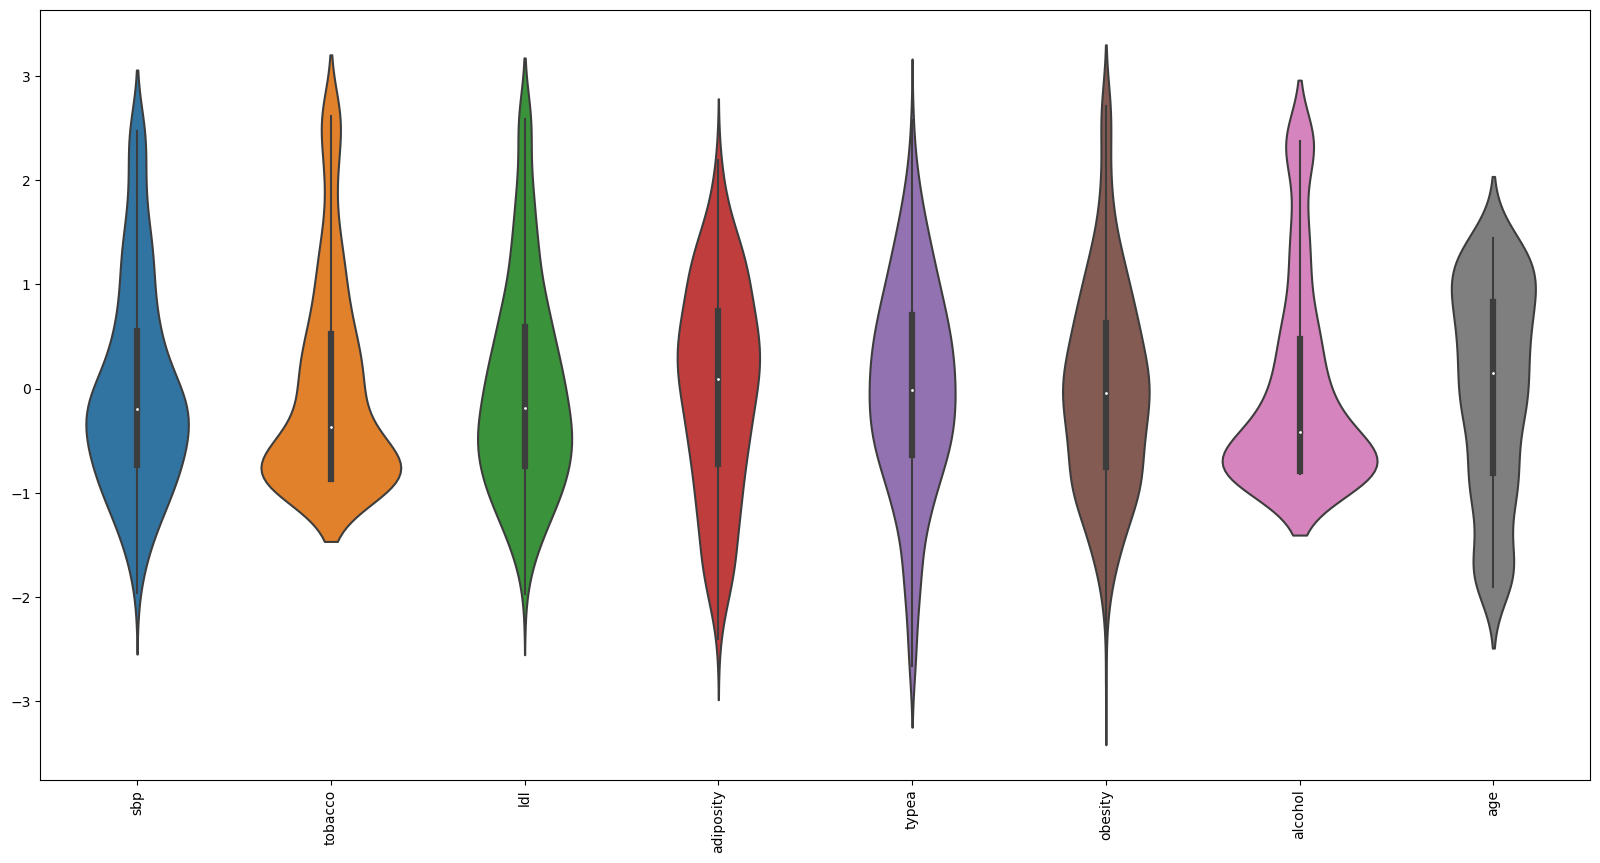

In [230]:
# violin plot of normalized data
fig, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(data=df3_normalized)
plt.xticks(rotation=90)
plt.show()

In [231]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.select_dtypes(include=[np.number])
    df = df.dropna(axis='columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for', fontsize=15)
    plt.show()

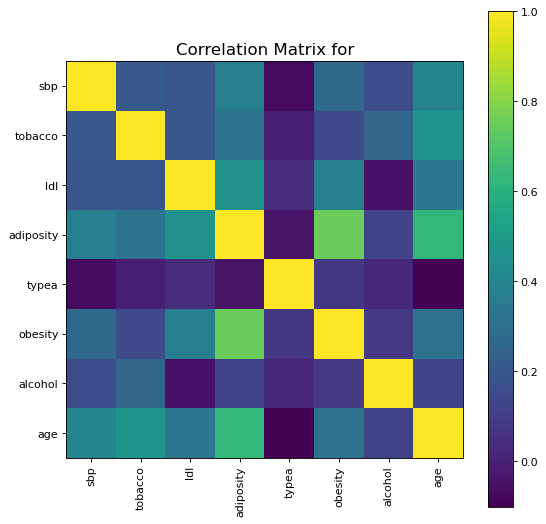

In [232]:
plotCorrelationMatrix(df3_normalized, 8)

In [233]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns')
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10:  # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.1, 0.2), xycoords='axes fraction', ha='left', va='center', size=textSize, color='red')
    plt.suptitle('Scatter and Density Plot')
    plt.show()

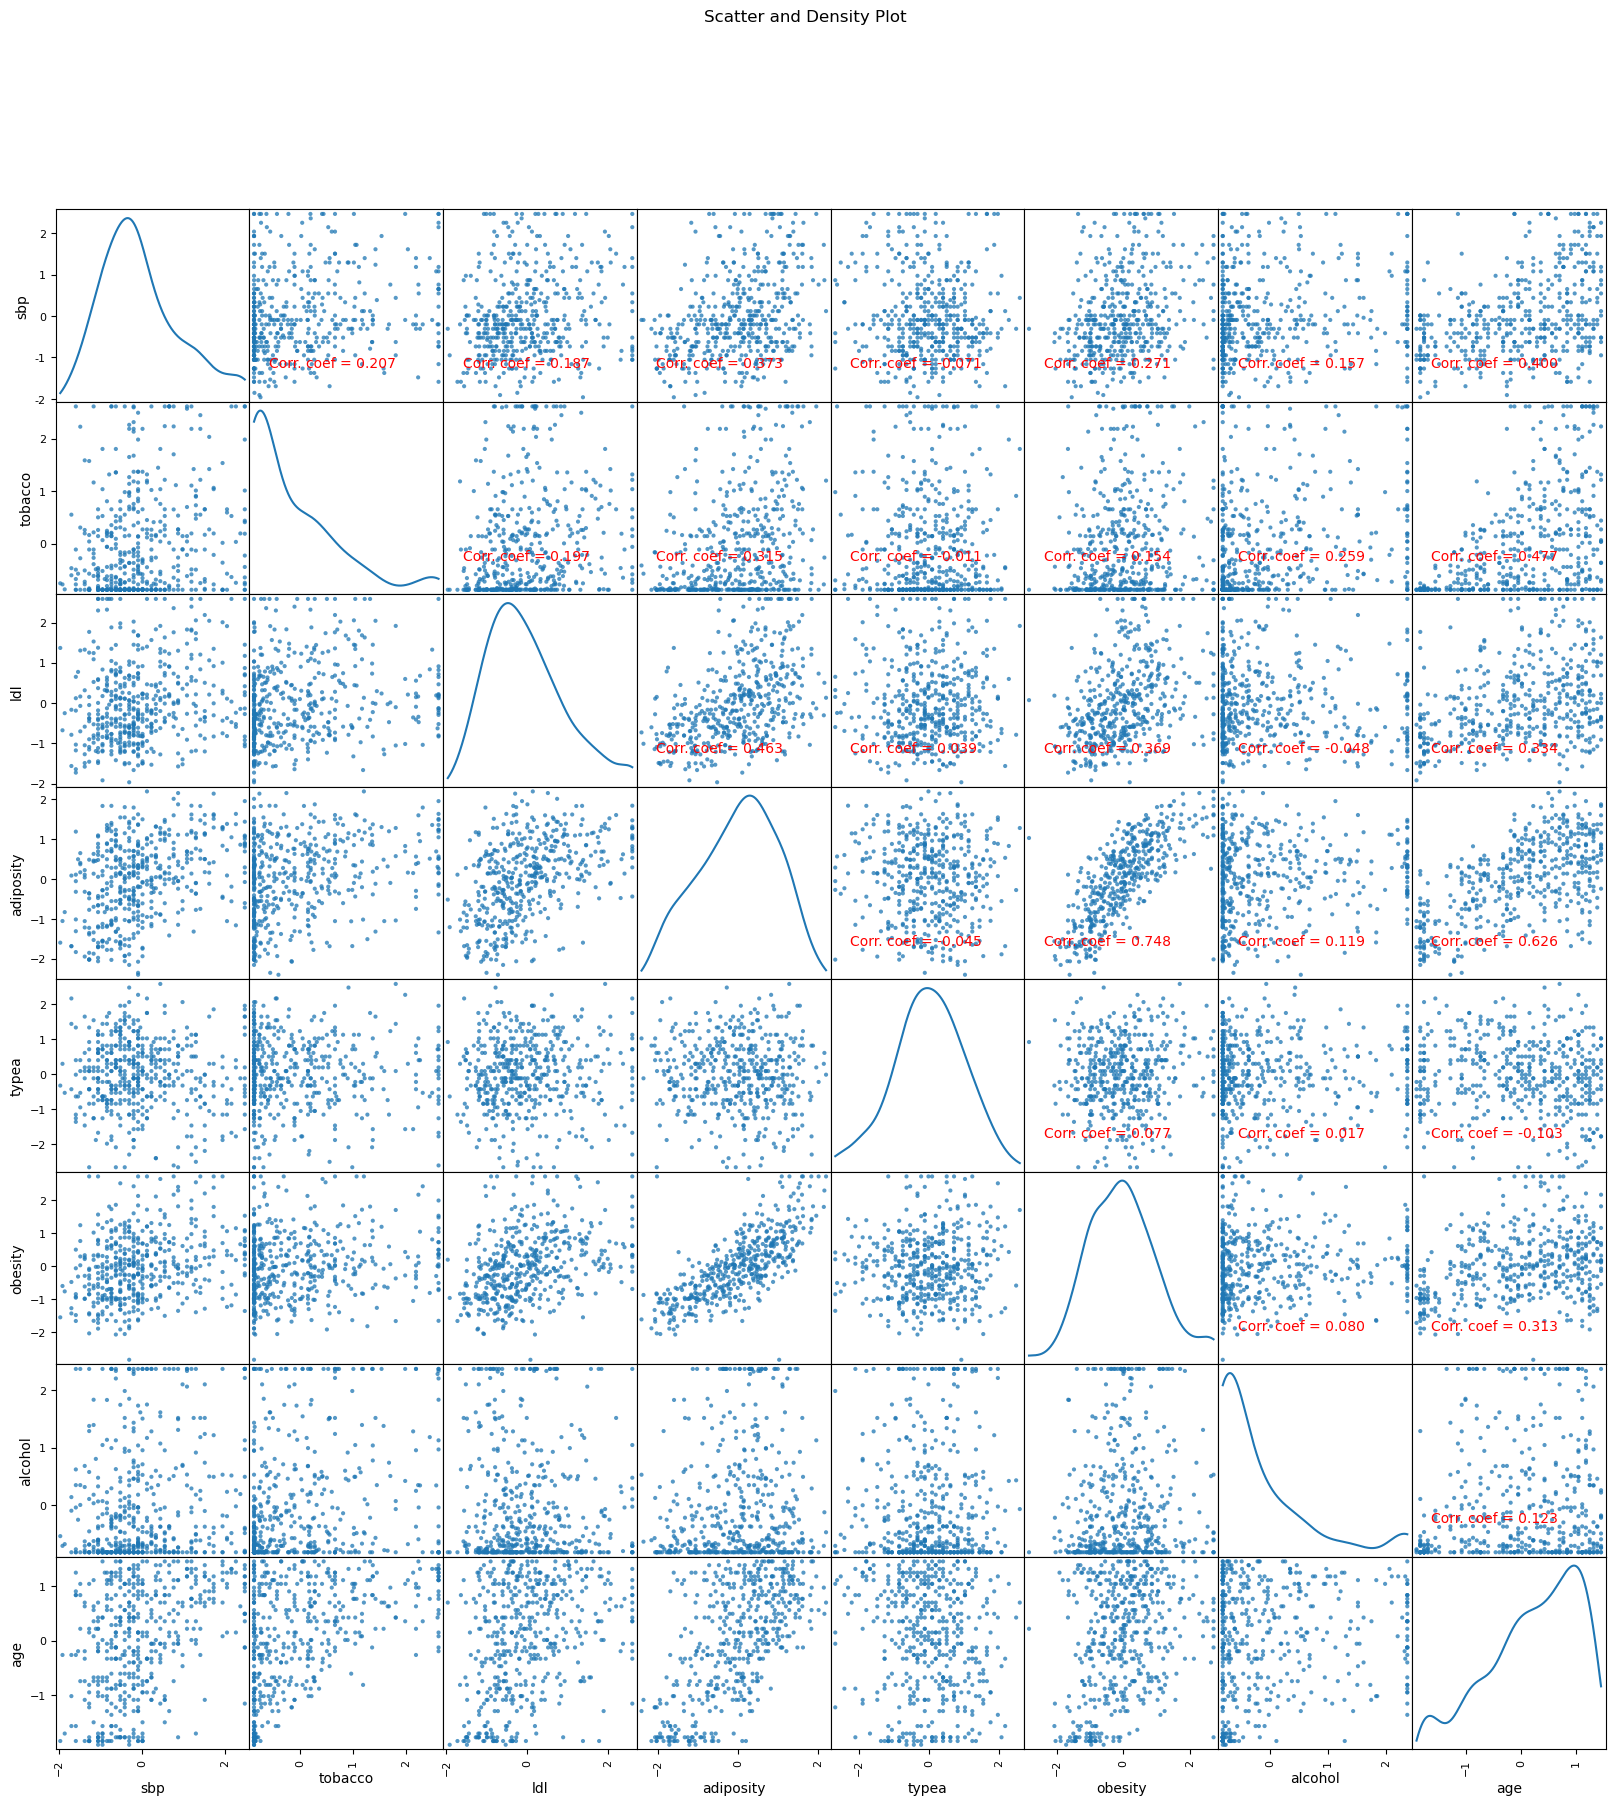

In [234]:
plotScatterMatrix(df3_normalized, 20, 10)

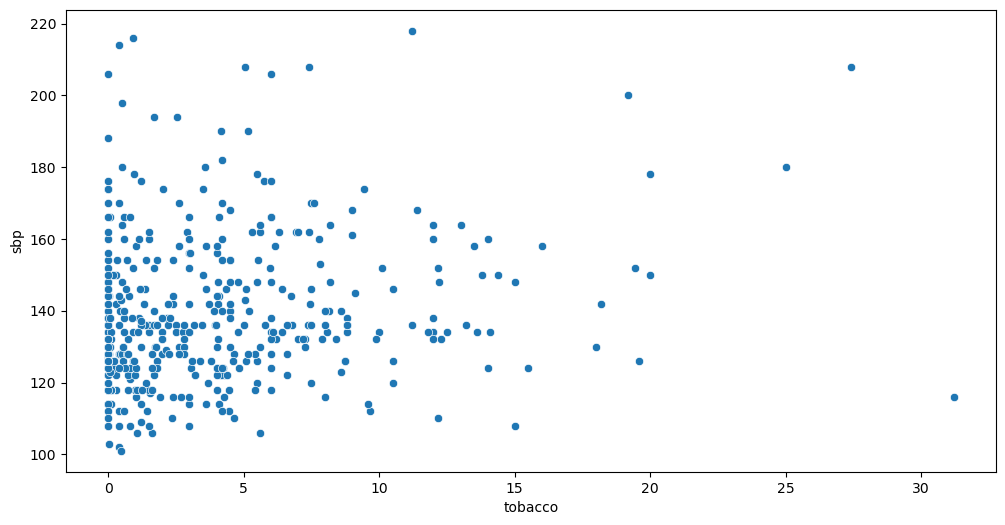

In [235]:
# plot spd vs tobacco
plt.figure(figsize=(12,6))
sns.scatterplot(data=df1,x='tobacco',y='sbp')
plt.show()

In [241]:
# remove rownames and famhist
df1_2 = df1.drop(['famhist'], axis=1)

c:\Users\AugustPC\scoop\apps\miniconda3\current\envs\ML\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


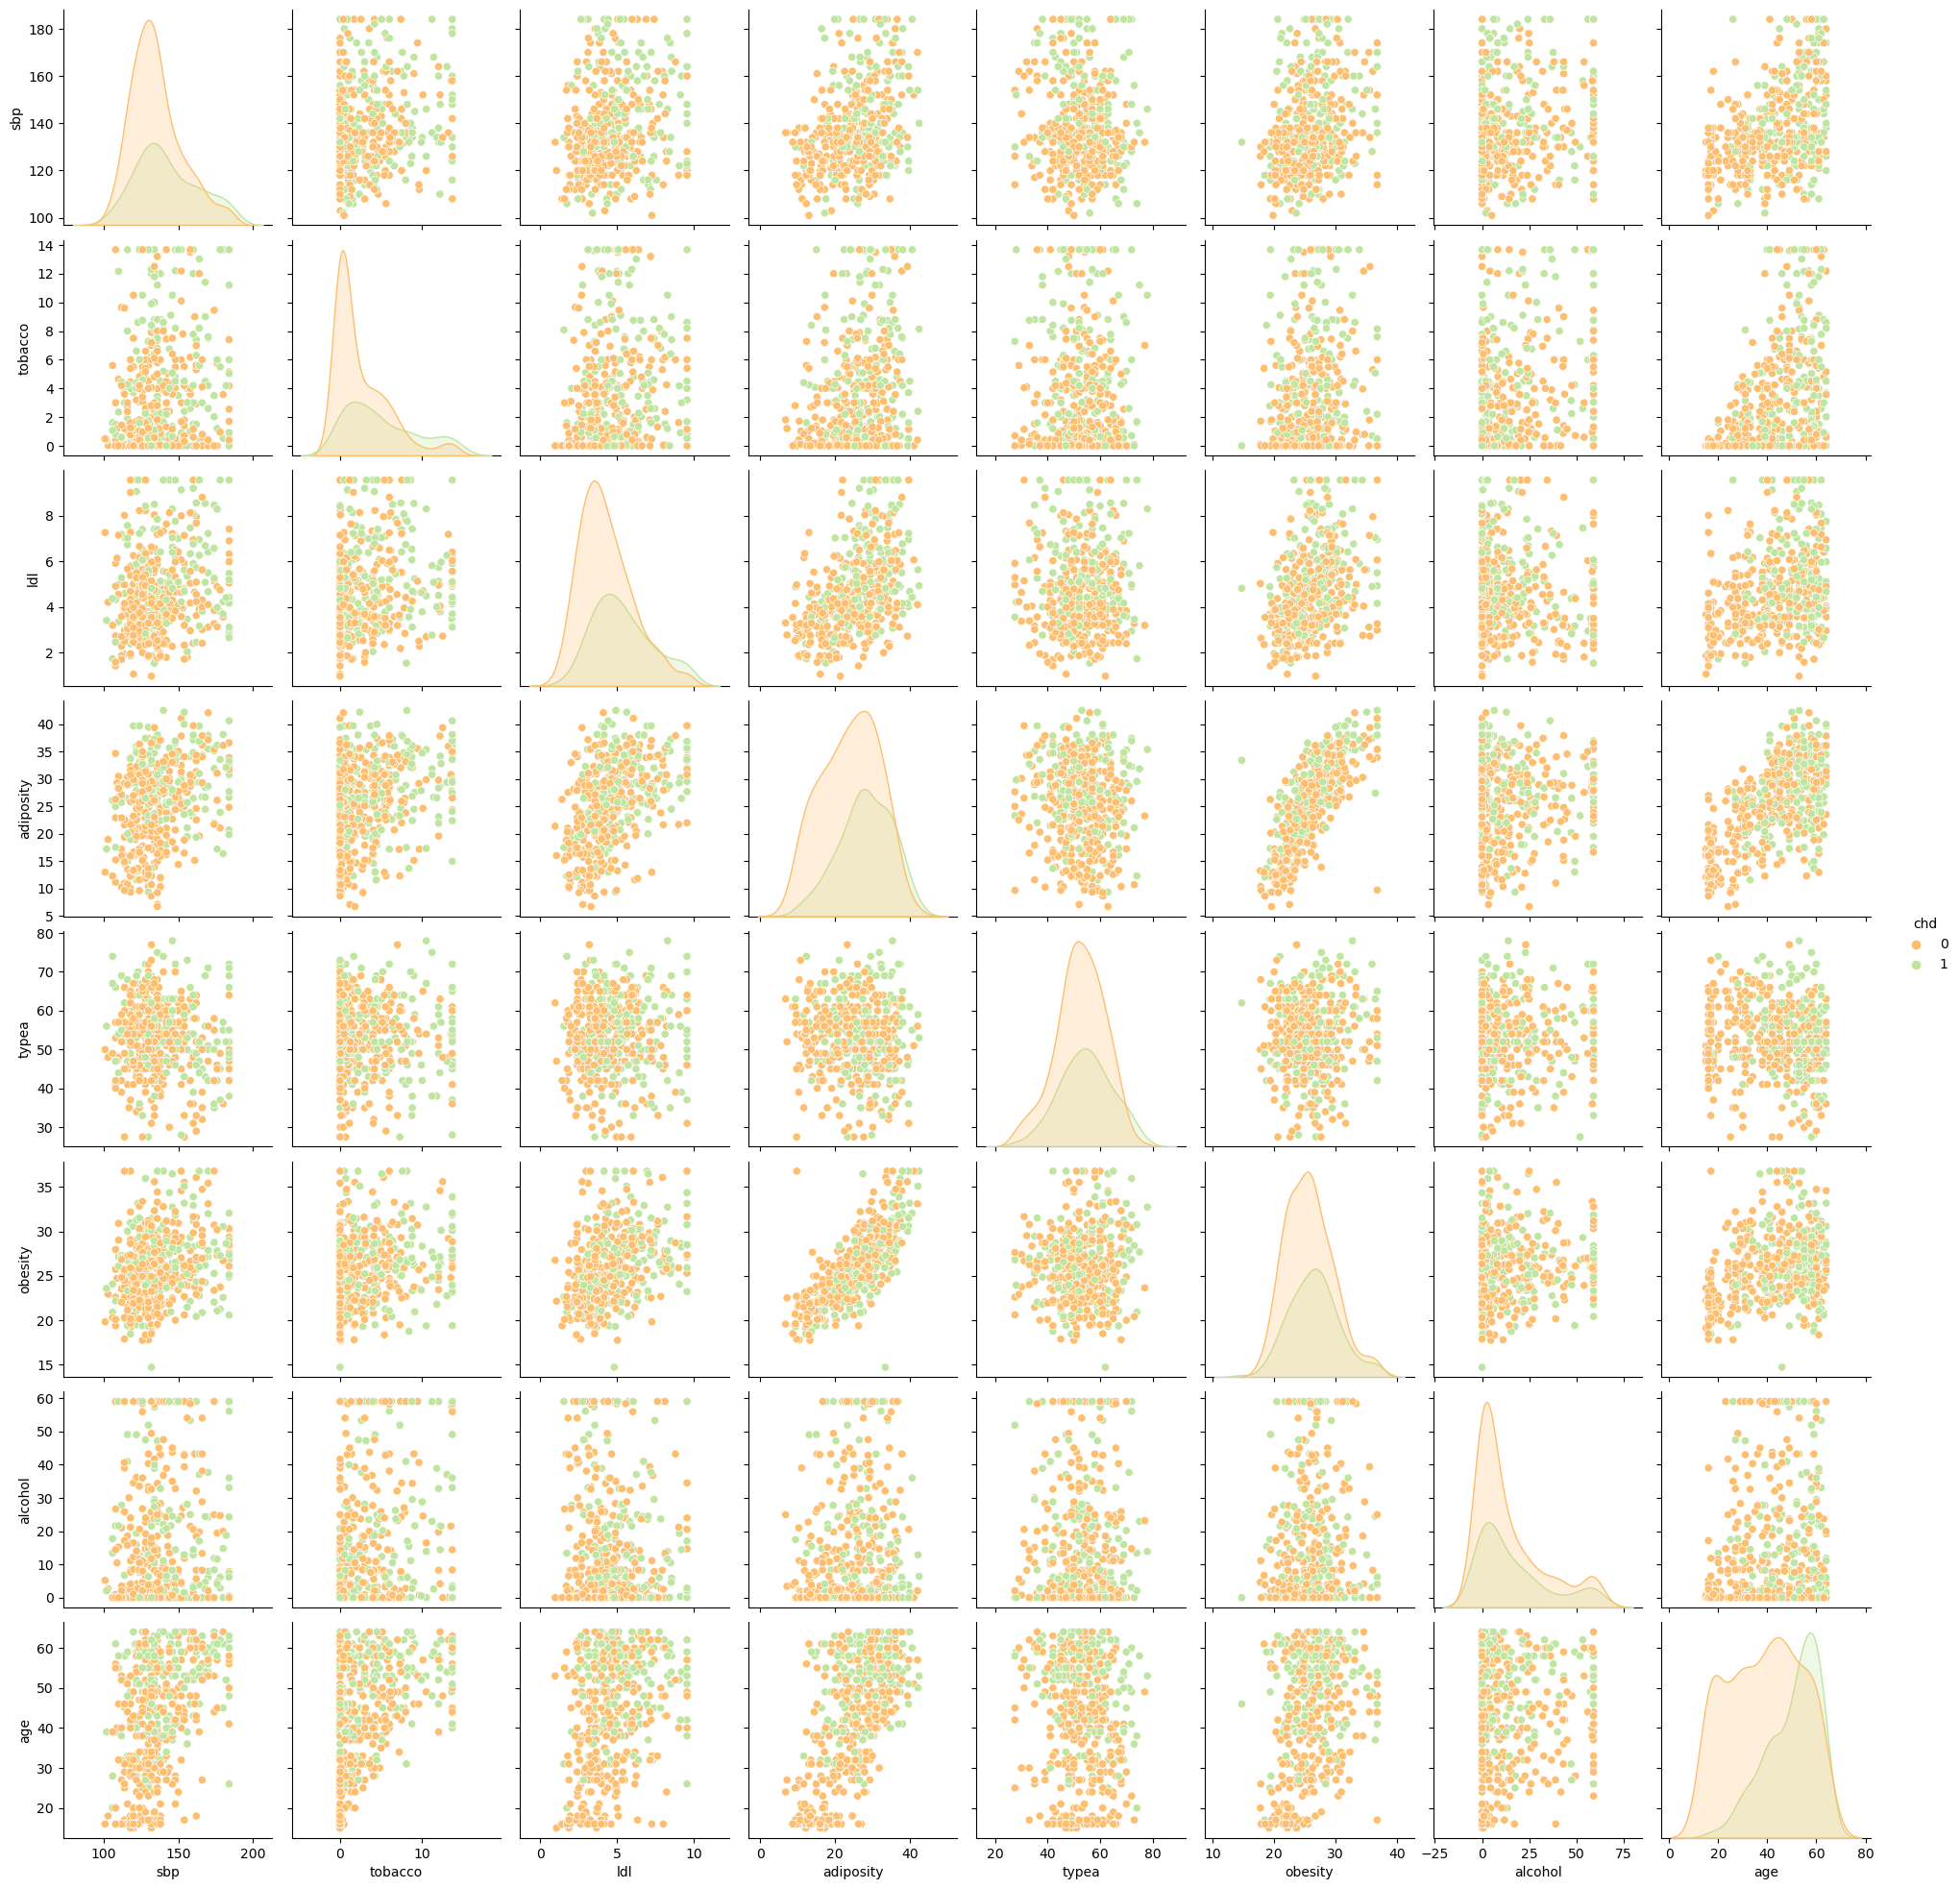

In [240]:
# pairwise plot with seaborn with chd as hue
sns.pairplot(df1_2, hue='chd')

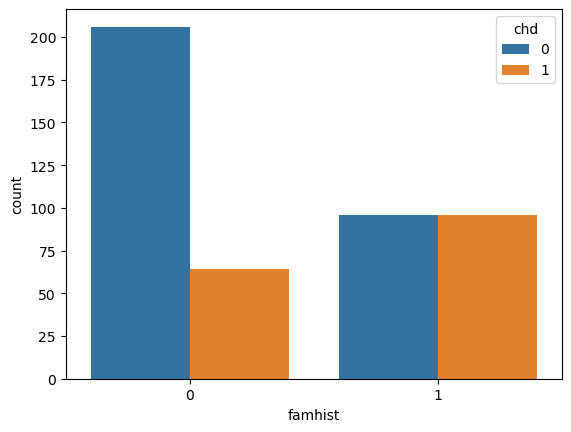

In [ ]:
sns.countplot(data = df2, x='famhist', hue='chd')
plt.show()

In [ ]:
# do svd
from scipy.linalg import svd
U, S, Vh = svd(df3_normalized, full_matrices=False)

# transpose Vh
V = Vh.T

Z = df3_normalized.dot(V)
Z.head()

0         1         2         3         4         5         6  \
0  1.660862 -0.876828  2.851139 -0.948372  0.310962 -0.583970  1.489181   
1  0.786577  1.438505 -0.163087 -0.628835 -0.026617 -1.606368 -0.189954   
2 -0.075196  1.679532 -0.180605 -0.529569  1.298687 -1.100372 -0.769200   
3  3.206894  0.731241  0.580095 -0.489889  0.223779 -1.392988  0.600431   
4  1.167537 -0.260154  3.668690 -0.317445  0.766181 -0.251010 -0.221281   

          7         8  
0  0.735305  0.277281  
1 -1.011674  0.495255  
2 -0.590862 -0.228844  
3  0.565468 -0.134624  
4  0.557475 -0.250668

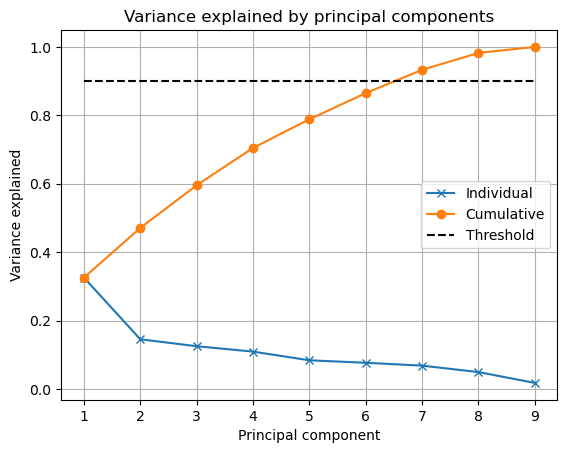

In [ ]:
rho = (S*S) / (S*S).sum() 

threshold = 0.90

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

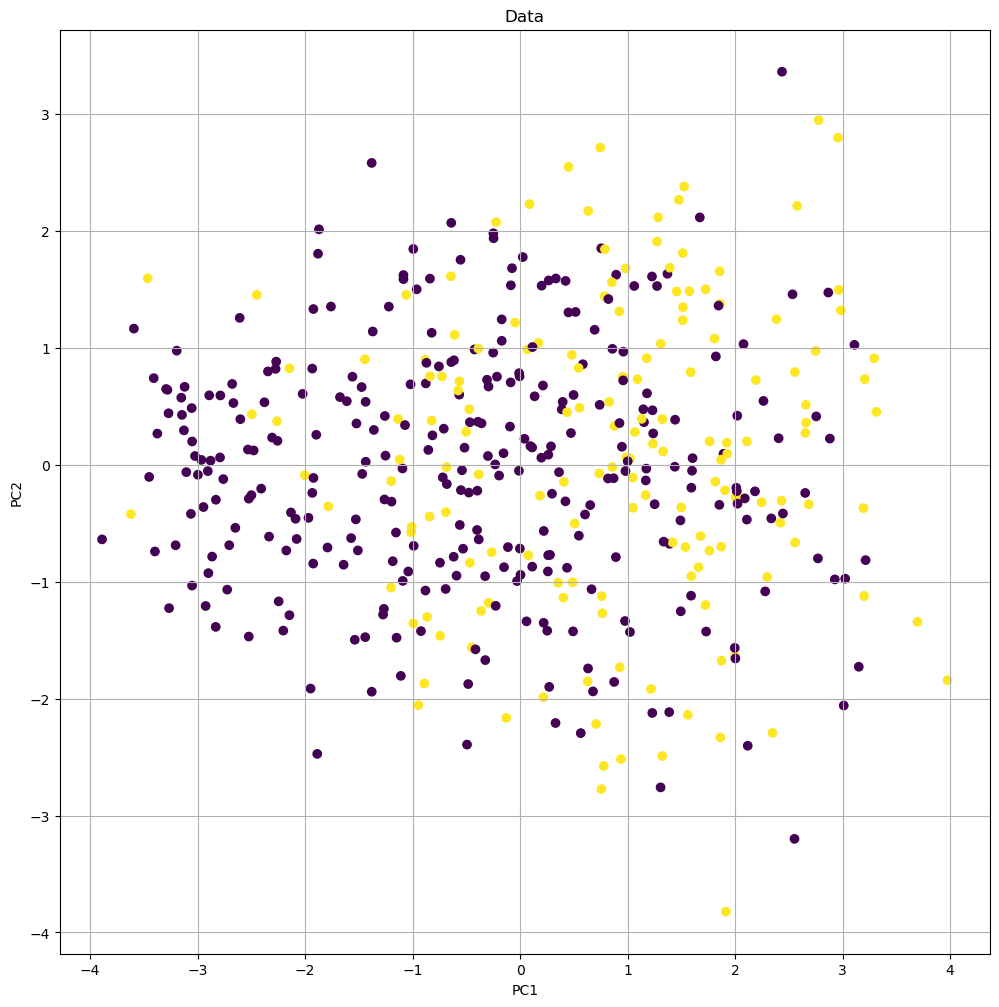

In [ ]:
# Plot PCA of the data with DNK_YN
# make plot bigger
plt.figure(figsize=(12,12))
plt.scatter(Z.iloc[:,0],Z.iloc[:,1],c=df2.chd, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data')
plt.grid()
plt.show()

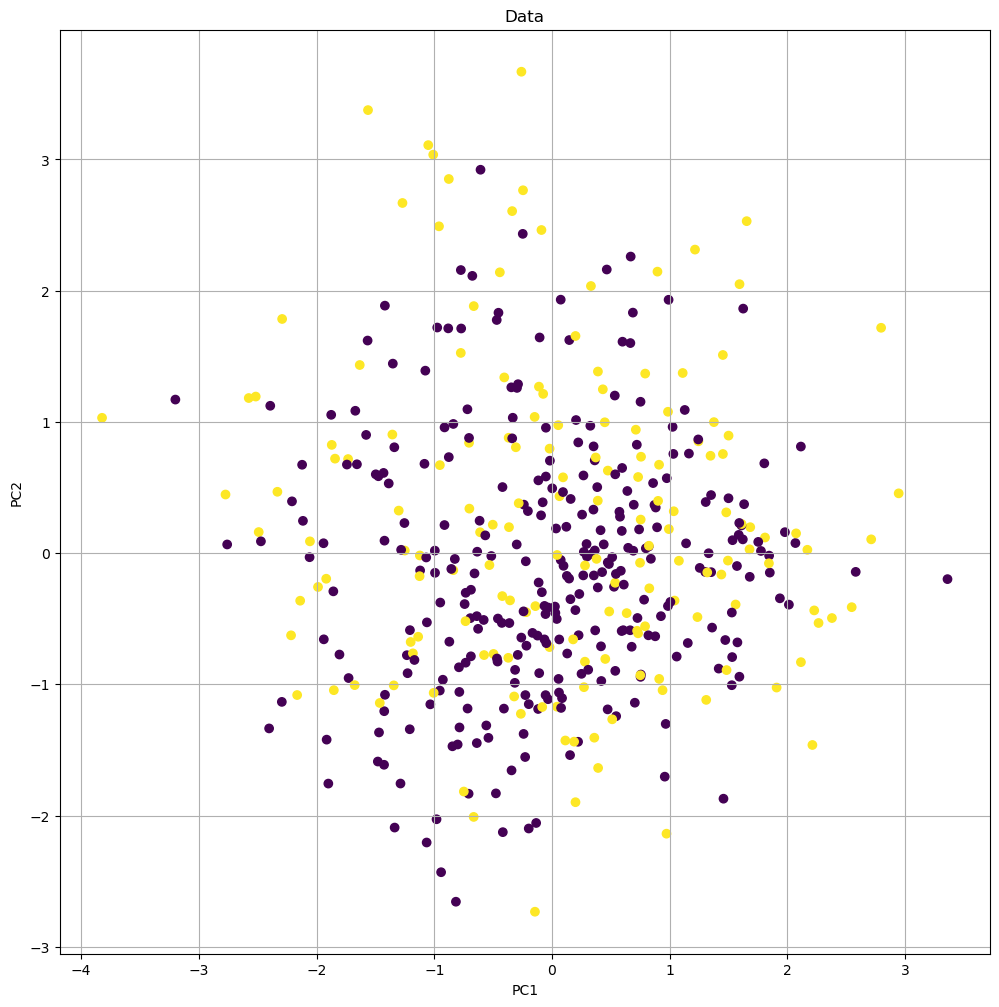

In [ ]:
# Plot PCA of the data with DNK_YN
# make plot bigger
plt.figure(figsize=(12,12))
plt.scatter(Z.iloc[:,1],Z.iloc[:,2],c=df2.chd, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data')
plt.grid()
plt.show()

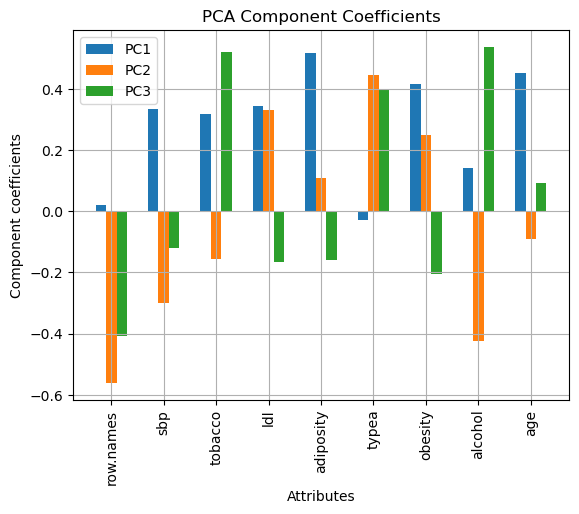

In [ ]:
columns = df3_normalized.columns
pcs = [0,1,2]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1,df3_normalized.shape[1]+1)
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, columns, rotation=90)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('PCA Component Coefficients')
plt.show()